<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classical Image Diffusion**

In [ ]:
!pip install pennylane torch torchvision pillow matplotlib -q

In [ ]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
from pathlib import Path
import os

def load_and_preprocess_image(image_path):
    try:
        # Load and resize image
        image = Image.open(image_path)
        # Convert to RGB if the image is in RGBA mode
        if image.mode == 'RGBA':
            image = image.convert('RGB')
        transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
        ])
        return transform(image).unsqueeze(0)
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

def forward_diffusion(x, num_steps=3):
    # Initialize list to store diffusion steps
    x_seq = [x]

    # Define beta schedule (increasing noise levels)
    betas = torch.linspace(0.01, 0.2, num_steps)

    # Apply noise gradually
    x_noisy = x
    for t in range(num_steps):
        noise = torch.randn_like(x)
        noise_level = torch.sqrt(betas[t])
        x_noisy = x_noisy * torch.sqrt(1 - betas[t]) + noise * noise_level
        x_seq.append(x_noisy)

    return x_seq

def visualize_diffusion(x_seq):
    # Create figure
    fig, axes = plt.subplots(1, len(x_seq), figsize=(15, 3))

    # Plot each step
    for i, x in enumerate(x_seq):
        img = x.squeeze().permute(1, 2, 0).clip(0, 1).cpu().numpy()
        axes[i].imshow(img)
        axes[i].axis('off')
        if i == 0:
            axes[i].set_title('Original')
        else:
            axes[i].set_title(f'Step {i}')

    plt.tight_layout()
    plt.show()

# Alternative file handling method
def run_forward_diffusion_from_path(image_path, num_steps=3):
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Load and preprocess image
    x = load_and_preprocess_image(image_path)

    if x is not None:
        # Apply forward diffusion
        x_seq = forward_diffusion(x, num_steps)

        # Visualize results
        visualize_diffusion(x_seq)
    else:
        print("Failed to process image. Please check the file path and format.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


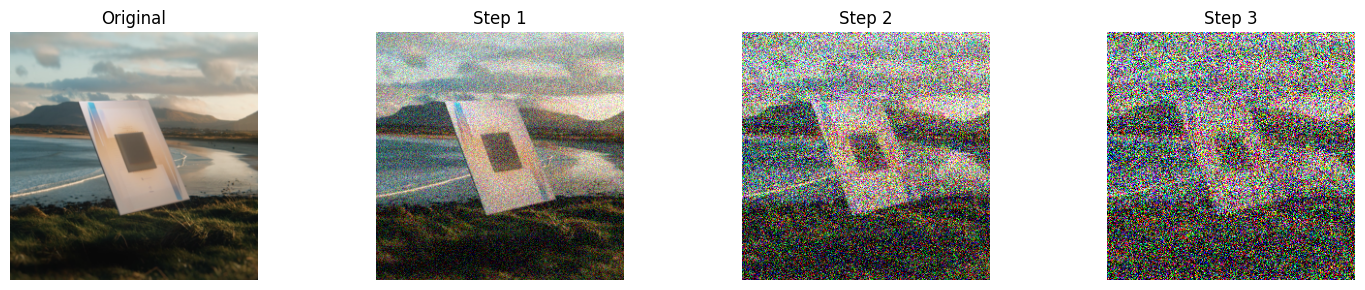

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
image_path = '/content/drive/MyDrive/willow.png'
run_forward_diffusion_from_path(image_path)